# Basic pyjseisio Usage
This notebook will demonstrate some of the basic uses of the pyjseis package for reading JavaSeis data. The data read is provided with the pyjseisio package as `test/synth.js`.

Basic reading features of the `jsdataset` API will be explored here, including:
* Opening a JavaSeis file for reading
* Viewing file meta-data
* Reading trace data from a frame
* Reading header data from a frame

First, the `pyjseisio` package along with `numpy` must be imported as follows: (`matplotlib` is also imported for plotting)

In [1]:
import numpy as np
import pyjseisio as js
import matplotlib.pyplot as p
%matplotlib inline

Let's first take a look at the fields available in `pyjseisio` with the `dir()` method:

In [2]:
usefulStuff = filter((lambda s: s[0:2]!='__'),dir(js))
print usefulStuff

['jsdataset', 'open', 'pyjseisio']


The notable entries here include:
* `jsdataset`: the primary class used to interact with a JavaSeis dataset
* `open`: the preferred method used to create a `jsdataset` object
* `pyjseisio`: the module containing all of the SWIG wrapped classes, ideally can be avoided 

## Opening a JavaSeis Dataset
The `open()` function from the previous line is a factory method used to instantiate a new `jsdataset` object, initialize it with a provided filename, and configure the object appropriately. While a `jsdataset` can be instantiated manually, this will require further manual creation of SWIG wrapped objects to open a file.

The following block uses the `open()` function to create a `jsdataset` object connected to the `synth.js` JavaSeis file, provided in the `test/` directory:

In [3]:
dataset = js.open("../test/synth.js")
usefulStuff = filter((lambda s: s[0:2]!='__'),dir(dataset))
print usefulStuff

['_reader', 'axes', 'getByteOrder', 'getByteOrderAsString', 'getDataType', 'getDescriptiveName', 'getFrameSizeOnDisk', 'getHeaderWordsInfo', 'getIOBufferSize', 'getNDim', 'getNFrames', 'getNtr', 'getNumBytesInHeader', 'getNumBytesInRawFrame', 'getNumHeaderWords', 'getNumOfExtents', 'getNumOfVirtualFolders', 'getTraceFormatName', 'getVersion', 'hdrs', 'isRegular', 'isSeisPEG', 'openForRead', 'readFrame', 'readFrameAndHdrs', 'readFrameHeader', 'readTraceHeaders', 'readTraces']


It is the goal of this project to expose many of the user-relevant API features of `JSeisIO` without needing to interact with the SWIG wrapper objects directly. All dataset reading is done through the object `dataset._reader`, which is an instance of the SWIG Python class `pyjseisio.jsFileReader`. All of the functionality of `_reader` is exposed through the convenience methods listed above. Some additional work is done to make access to meta-data more convenient, for example header entries can be accessed through the `hdrs` dictionary.

## Reading Trace Data From a Frame
Of course the most exciting item is to load some data quickly, so let's get that out of the way first thing. The _trace amplitude data_ can be read from a frame using the `readFrame()` method:

In [4]:
frame = dataset.readFrame(0) # read the trace data from the first frame in the dataset
print type(frame)
print frame.shape
print frame[1][100]

<type 'numpy.ndarray'>
(40, 501)
0.889101


The variable `frame` is a `numpy ndarray` that holds the trace data read from frame `0` in the dataset. The array is arranged in descending order of dimension, i.e. samples can be accessed as `frame[TRACE][SAMPLE]`.

Let's plot the frame we just read to make sure it's something sensible! Note that in order to get the traditional (t-x) orientation for seismic displays, `frame.transpose()` is plotted instead of just `frame`:

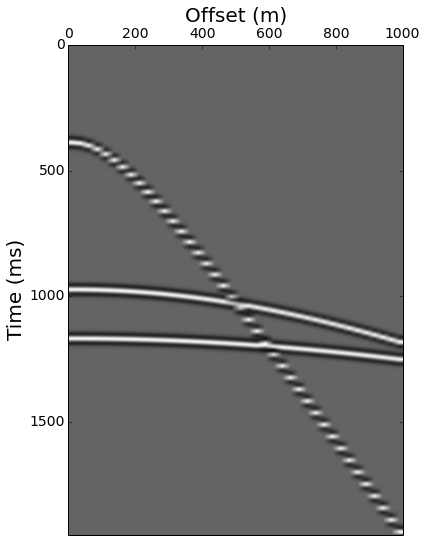

In [5]:
fig = p.figure(figsize=(6,15))
plotExtents = [dataset.axes[0].physicalValues[0], 
              dataset.axes[0].physicalValues[-1],
              dataset.axes[1].physicalValues[-1], 
              dataset.axes[1].physicalValues[0]]
p.ylabel("Time (ms)", fontsize=20)
p.xlabel("Offset (m)", fontsize=20)
p.tick_params(labelsize=14)
p.gca().xaxis.tick_top()
p.gca().xaxis.set_label_position("top")
p.imshow(frame.transpose(), aspect=0.75, cmap='gray', extent=plotExtents);

## MORE TO COME

In [6]:
print dataset.hdrs.keys()
y = dataset.readFrameAndHdrs(0)[1]
print dataset.hdrs['OFFSET'].getFloatVal(y[10])
print dataset.hdrs['OFFSET'].setFloatVal(y[10],12345)
print dataset.hdrs['OFFSET'].getVal(y[10])

['AOFFSET', 'TFULL_E', 'EOJ', 'LINE_NO', 'CHAN', 'FILTERID', 'END_VOL', 'TIME_IND', 'IF_FLAG', 'TFULL_S', 'LSEG_SEQ', 'CDP_YD', 'SEQNO', 'OFFSET', 'CDP_Y', 'CDP_X', 'END_ENS', 'XLINE_NO', 'AMP_NORM', 'SKEWSTAT', 'IF_END', 'ILINE_NO', 'PAD_TRC', 'LEN_SURG', 'TOT_STAT', 'NA_STAT', 'DS_SEQNO', 'CDP_XD', 'TR_FOLD', 'TRC_TYPE', 'TLIVE_S', 'LSEG_END', 'CDP', 'TLIVE_E', 'TRACENO']
500.0
1
12345.0


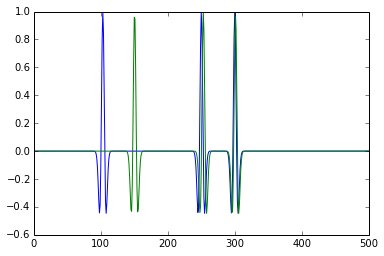

In [7]:
tr = dataset.readTraces(0,10)
p.plot(tr[2]);
p.hold
p.plot(tr[9]);

In [8]:
hdr = dataset.readTraceHeaders(0,1)
print (hdr.shape)
print(y[0].shape)
print(hdr)
print(y[0])

ValueError: total size of new array must be unchanged